#Pergunta fundamental

Qual a confiança que estes dados nos passam?

#Inferência Estatística


Métodos estatísticos são usados para tomar decisões e tirar conclusões acerca de populações

**População**: uma coleção de exemplos

**Amostra**: um subconjunto da população

**Meta**: estimar alguma estatística da população (ex: média, mediana, variância etc) com base em estatísticas da amostra

**Fato**: Se a amostra é <u>aleatória</u>, ela tende a exibir as mesmas propriedades da população da qual fora obtida


De modo geral, para amostras aleatórias temos os seguintes estimadores pontuais:
* A média da amostra ($\bar{x}$) é um estimador "razoável" para a média da população ($\mu$)
* A variância da amostra ($s^2 = \frac{\sum_{i=1}^{N}(x_i-\bar{x})}{N-1}$, atenção ao $N-1$ no denominador) é um estimador "razoável" para a variância da população $\sigma^2$
* A proporção $\hat{p}$ de itens em uma amostra que pertencem a uma classe de interesse é um estimador "razoável" para a proporção $p$ de itens em uma população que pertencem a uma classe de interesse
* A diferença das médias de duas amostras independentes ($\bar{x}_1 - \bar{x}_2$) é um estimador "razoável" para diferença entre as médias de duas populações $\mu_1 - \mu_2$
* A diferença das proporções de duas amostras independentes ($\hat{p}_1 - \hat{p}_2$) é um estimador "razoável" para a diferença das proporções em duas populações $p_1 - p_2$.

## Será mesmo?

Vamos gerar dados de diferentes distribuições: uniforme contínua ($U$) com $a=10$ e $b=20$, normal ($N$) com $\mu=10$ e $\sigma=2$ e exponencial ($E$) com $\lambda=1$. Estas serão nossas populações. Para cada uma delas iremos computar $\mu$ e $\sigma$, respectivamente a média e o desvio padrão da população.

Em seguida, vamos selecionar 1 amostra aleatória de tamanho 20 de cada uma destas populações e vamos computar o média ($\bar{x}$) e o desvio-padrão ($s$) da amostra.

Vamos então computar o erro destas estimativas em relação à estatística alvo, para a média $\mu-\bar{x}$ e para o desvio $\sigma-s$.

In [ ]:
import scipy.stats as st
import numpy as np
import random as rd

n_pop = 100000
n_amo = 20

a = 10
b = 20
U = st.uniform.rvs(a,b-a,size=n_pop)

mu = 10
sigma = 2
N = st.norm.rvs(mu,sigma,size=n_pop)

lambd = 1
E = st.expon.rvs(lambd,size=n_pop)

pop = {
    "uniforme": U,
    "normal": N,
    "exponencial": E
}

for (k,v) in pop.items():
  amostra = rd.sample(list(v),n_amo)

  media_pop = np.average(v)
  media_amo = np.average(amostra)
  dp_pop = np.std(v)
  dp_amo = np.std(amostra,ddof=1)

  print("Distribuição "+k)
  print("Média pop:"+str(round(media_pop,2)))
  print("Média amo:"+str(round(media_amo,2)))
  print("Erro na média:"+str(round(media_pop-media_amo,2)))
  print("DP pop:"+str(round(dp_pop,2)))
  print("DP amo:"+str(round(dp_amo,2)))
  print("Erro no desvio:"+str(round(dp_pop-dp_amo,2)))
  print("")

Distribuição uniforme
Média pop:15.01
Média amo:14.88
Erro na média:0.13
DP pop:2.88
DP amo:2.69
Erro no desvio:0.18

Distribuição normal
Média pop:10.0
Média amo:9.96
Erro na média:0.04
DP pop:2.0
DP amo:2.28
Erro no desvio:-0.28

Distribuição exponencial
Média pop:2.0
Média amo:1.72
Erro na média:0.28
DP pop:1.0
DP amo:0.59
Erro no desvio:0.41



Os erros não são tão grandes. Tivemos sorte? Os valores que estamos lidando são pequenos? Ou os estimadores são "realmente bons"?

Um estimador $\hat{\theta}$ baseado na amostra para a estatística $\theta$ da população é "bom" quando é **não tendencioso** (não enviesado), i.e., quando $E(\hat{\theta}-\theta) = 0 \Rightarrow E(\hat{\theta}) = \theta$.

O experimento abaixo mostra que a média e a variância são estimadores com essa propriedade. A seguir, sobre as populações previamente definidas, retiramos 100 amostras de tamanhos variados e verificamos que conforme aumenta o tamanho da amostra, a estimativa pela média e pela variância ficam melhores.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

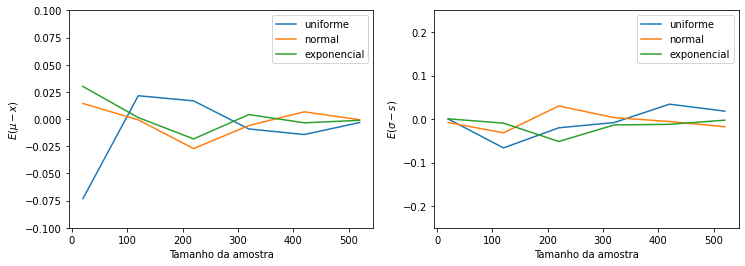

In [ ]:
import matplotlib.pyplot as plt

def getDif(pop,n):
  media_pop = np.average(pop)
  dp_pop = np.var(pop)

  media_amo = []
  dp_amo = []

  for i in range(100):
    amostra = rd.sample(list(pop),n)
    media_amo.append(np.average(amostra))
    dp_amo.append(np.var(amostra,ddof=1))

  media_amo = np.array(media_amo)
  dp_amo = np.array(dp_amo)

  difMedia = np.average(media_amo-media_pop)
  difDp = np.average(dp_amo-dp_pop)

  return difMedia, difDp


n_amo_v = range(20,600,100)
plt.figure(figsize=(12,4))


for k,v in pop.items():
  difMedia = []
  difDp = []

  for n_amo in n_amo_v:
    dM, dDp = getDif(v,n_amo)
    difMedia.append(dM)
    difDp.append(dDp)

  plt.subplot(1,2,1)
  plt.plot(n_amo_v,difMedia,label=k)
  plt.subplot(1,2,2)
  plt.plot(n_amo_v,difDp,label=k)

plt.subplot(1,2,1)
plt.xlabel("Tamanho da amostra")
plt.ylabel("$E(\mu-x)$")
plt.ylim(-0.1,0.1)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Tamanho da amostra")
plt.ylabel("$E(\sigma-s)$")
plt.ylim(-0.25,0.25)
plt.legend()

plt.show()

Daqui observamos que uma vez que a amostra é razoavelmente grande, a média e a variância da amostra são boas aproximações da média e do desvio-padrão da população. Independentemente da distribuição que os dados da população sigam.

# Intervalos de confiança

Os gráficos acima foram obtidos por meio de várias amostras de mesmo tamanho de uma população, mas <u>quão confiantes devemos estar sobre os valores da média e do desvio-parão ao obtermos uma única amostra</u>?

De outra forma: e se tivessemos uma forma de estimar não só uma estatística pontual, mas um intervalo, construído a partir da amostra, que, com alguma confiança, contenha o parâmetro verdadeiro da população?

A isso damos o nome de **intervalo de confiança** (IC)!



## Vamos falar sobre confiança?

Dada uma moeda, estime a probabilidade de obter cara a partir do resultado de algumas jogadas.

1. Se jogarmos <u>uma vez e tivermos uma cara</u>, quão confiante você estaria em dizer que $P(\text{cara})=1$?
2. Se jogarmos <u>duas vezes e tivermos duas caras</u>, quão confiante você estaria em dizer que $P(\text{cara})=1$?
3. Se em <u>100 jogadas tivermos 100 caras</u>, quão confiante você estaria em dizer que $P(\text{cara})=1$?
4. Se em <u>100 jogadas tivermos 52 caras</u>, quão confiante você estaria em dizer que $P(\text{cara})=\frac{52}{100}$?

Deste exercício imaginário tiramos duas observações:
* **Intuitivamente**: a confiança nas nossas estimativas dependem de dois fatores
 * Tamanho da amostra (crescemos de 2 para 100)
 * Variância da amostra (100/100 caras vs. 52/100 caras)
* **Fato**: Conforme a variância cresce, nós precisamos de maiores amostras para termos o mesmo grau de confiança



## Distribuições amostrais

Considere a população com uma certa estatística $\theta$ e suponha que podemos calcular esta estatística a partir da amostra $\hat{\theta}$. Deve-se observar que $\hat{\theta}$ é também uma VA.

Considere o caso de uma população com uma média conhecida $\theta$, por exemplo. Ao retirarmos $N$ amostras de uma população e fazermos a média de cada amostra, veremos que estas médias podem ser diferentes da média original, havendo uma variabilidade sobre a média. Isso mostra que $\hat{\theta}$ é uma VA e que possui uma <u>distribuição amostral</u>.

Os exemplos abaixo ilustram esta ideia.

### Exemplo (amostras de uma população normal)

Abaixo nós geramos amostras de uma população normalmente distribuída com $\mu = 10$ e $\sigma=2$. Nós fazemos 100 amostras com 20 números em cada e obtemos a média de cada amostra. Observe ao final que temos uma distribuição para esta estatística.

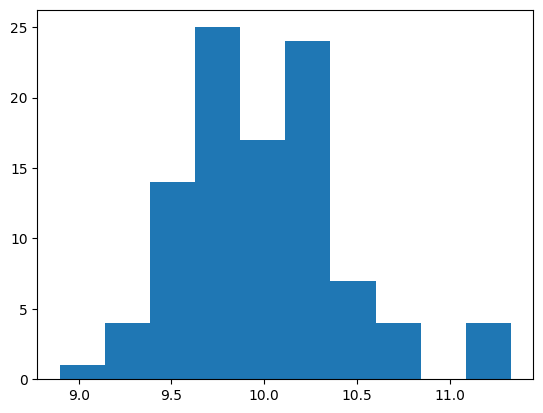

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

medias = []
for i in range(100):
  amostra = st.norm.rvs(10,2,size=20)
  medias.append(np.average(amostra))

plt.hist(medias)
plt.show()

### Exemplo (montando a VA de uma estatística)

Considere que a VA de uma população tem a seguinte distribuição:

x  | 1 | 2 | 3 |
---|---|---|---|
p(X=x)| $\frac{1}{3}$ | $\frac{1}{3}$ | $\frac{1}{3}$ |

Observe que esta variável tem $E(X) = 2$ e $Var(X) = \frac{2}{3}$.

Vamos agora construir a VA para a estatística média desta VA, considerando amostras com $N=2$, com reposição. Assim temos:

Amostras  | Probabilidade | Média Amostral ($\bar{x}$) |
---|---|---|
(1,1) | $\frac{1}{9}$ | 1,0 |
(1,2) | $\frac{1}{9}$ | 1,5 |
(1,3) | $\frac{1}{9}$ | 2,0 |
(2,1) | $\frac{1}{9}$ | 1,5 |
(2,2) | $\frac{1}{9}$ | 2,0 |
(2,3) | $\frac{1}{9}$ | 2,5 |
(3,1) | $\frac{1}{9}$ | 2,0 |
(3,2) | $\frac{1}{9}$ | 2,5 |
(3,3) | $\frac{1}{9}$ | 3,0 |

Nesse caso, a distribuição da estatística $\bar{X}$ é

$\bar{x}$  | 1,0 | 1,5 | 2,0 | 2,5 | 3,0 |
---|---|---|---|---|---|
$P(\bar{X}=\bar{x})$| $\frac{1}{9}$ | $\frac{2}{9}$ | $\frac{3}{9}$ | $\frac{2}{9}$ | $\frac{1}{9}$ |

Então temos que $E(\bar{X}) = 2$ e $Var(\bar{X})=\frac{1}{3}$

A partir deste exemplo, vemos que $E(\bar{X}) = E(X)$ e que $Var(\bar{X})=\frac{Var(X)}{n}$

## Distribuição amostral da média
Destes exemplos, generalizamos um importante resultado da inferência estatística.

Seja $X$ uma VA com valor esperado $\mu$ e variância $\sigma^2$
e $\bar{X}$ a VA da média amostral de tamanho $n$ de X.
Então:

a. $E(\bar{X}) = \mu$

b. $Var(\bar{X}) = \frac{\sigma^2}{n}$ (observe que o tamanho da amostra diminui a variância da média amostral)

c. $std(\bar{X}) = \frac{\sigma}{\sqrt{n}}$ (chamamos $std(\bar{x})$ de **erro padrão**)

d. A distribuição de $\bar{X}$ aproxima-se de uma distribuição normal com valor esperado $\mu$ e variância $\frac{\sigma^2}{n}$, quando $n$ cresce (Teorema do Limite Central). Observe que $\sigma^2$ é a variância da população. Observe que a estatística $z = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$ também se distribui como uma normal, mas com média 0 e desvio padrão 1.

e. Quando não temos a variância da população, teremos de estimá-la pela variância da amostra ($s^2$). Neste caso, um outro resultado nos permite dizer que a estatística $t = \frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}$ se distribui como uma distribuição T de Student com $n-1$ graus de liberdade (parâmetro da distribuição t). Esta distribuição tem média 0 e variância $\frac{n-1}{n-3}$.

f. Assim, se não conhecemos a variância populacional e $n$ é pequeno (usualmente $n \lt 30$) a estatística T é mais adequada. Para $n$ grande a diferença entre a distrinuição normal t-student é desprezível e, portanto, podemos usar a estatística $z$, mas substituindo $\sigma$ por $s$.

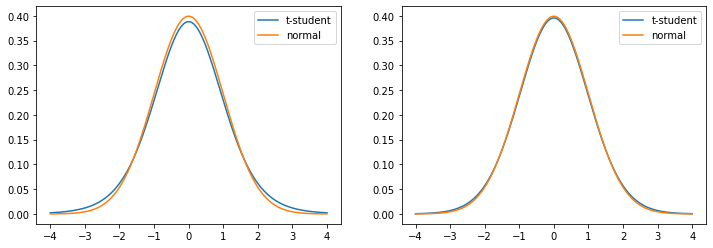

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
x = np.linspace(-4,4,1000)

plt.subplot(1,2,1)
n = 10 #tamanho de uma amostra hipotética
ft = st.t.pdf(x,df=n-1)
plt.plot(x,ft,label="t-student")
fnorm = st.norm.pdf(x,0,1)
plt.plot(x,fnorm,label="normal")
plt.legend()

plt.subplot(1,2,2)
n = 30 #tamanho de uma amostra hipotética
ft = st.t.pdf(x,df=n-1)
plt.plot(x,ft,label="t-student")
fnorm = st.norm.pdf(x,0,1)
plt.plot(x,fnorm,label="normal")
plt.legend()

plt.show()

## Mas então o que é IC?

Escolha uma fração $0 \lt f \lt 1$. Um intervalo com $f \times 100$\% de confiança para uma estatística é um intervalo construído sobre a distribuição amostral daquela estatística. Tal intervalo tem a propriedade de que, tomadas várias amostras da população, <u>o parâmetro da população estará dentro do intervalo construído de uma fração $f \times 100$% destas amostras</u>.

No caso da média, sabemos que a distribuição amostral segue uma Normal ou uma T de Student (conforme $n$). O IC então será um intervalo centrado na média de $\bar{X}$ que contém uma fração $f$ da área da distribuição amostral de $\bar{X}$. Valores comuns para $f$ são $0.9$, $0.95$ e $0.99$.

Abaixo mostramos estas áreas.

O IC para a média à 90% de confiança vai de -1.64 à 1.64
O IC para a média à 95% de confiança vai de -1.96 à 1.96
O IC para a média à 99% de confiança vai de -2.58 à 2.58


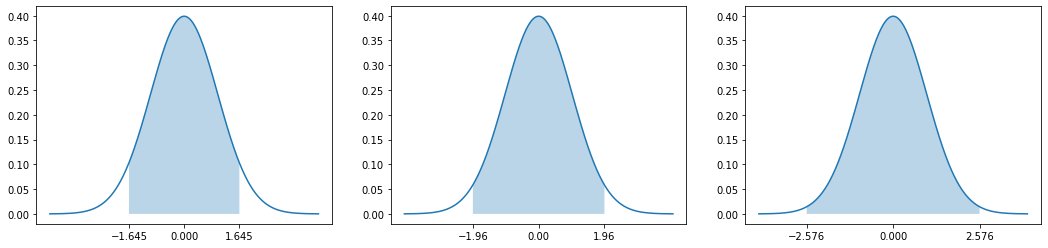

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

int90 = st.norm.ppf([0.05,0.95])
print("O IC para a média à 90% de confiança vai de "+str(round(int90[0],2))+" à "+str(round(int90[1],2)))
int95 = st.norm.ppf([0.025,0.975])
print("O IC para a média à 95% de confiança vai de "+str(round(int95[0],2))+" à "+str(round(int95[1],2)))
int99 = st.norm.ppf([0.005,0.995])
print("O IC para a média à 99% de confiança vai de "+str(round(int99[0],2))+" à "+str(round(int99[1],2)))

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
x = np.linspace(-4,4,1000)
fnorm = st.norm.pdf(x,0,1)
plt.plot(x,fnorm)
x90 = np.linspace(int90[0],int90[1],1000)
fnorm90 = st.norm.pdf(x90,0,1)
plt.fill_between(x90,fnorm90,alpha=0.3)
plt.xticks([int90[0],0,int90[1]])

plt.subplot(1,3,2)
x = np.linspace(-4,4,1000)
fnorm = st.norm.pdf(x,0,1)
plt.plot(x,fnorm)
x95 = np.linspace(int95[0],int95[1],1000)
fnorm95 = st.norm.pdf(x95,0,1)
plt.fill_between(x95,fnorm95,alpha=0.3)
plt.xticks([int95[0],0,int95[1]])

plt.subplot(1,3,3)
x = np.linspace(-4,4,1000)
fnorm = st.norm.pdf(x,0,1)
plt.plot(x,fnorm)
x99 = np.linspace(int99[0],int99[1],1000)
fnorm99 = st.norm.pdf(x99,0,1)
plt.fill_between(x99,fnorm99,alpha=0.3)
plt.xticks([int99[0],0,int99[1]])

plt.show()

Observe que para <u>maior confiança, obtemos maior intervalo</u>. Além disso, sabemos que a variabilidade de $\bar{X}$ diminui com o tamanho da amostra, assim <u>com amostras maiores conseguimos intervalos menores</u>.

###Estimando o IC para a média

1. Dada uma amostra <u>aleatória</u> da população, escolha um nível de confiança $f = 1-\alpha$ ($\alpha$ é chamado **nível de significância**)
2. Compute a média e o desvio padrão amostrais
3. Use o desvio padrão amostral (ou populacional, se estiver disponível) para calcular o erro padrão
4. Use o erro padrão e o nível de confiança para gerar o IC para a média amostral (aqui usaremos uma Distribuição Normal ou uma Distribuição T de Student, de acordo com $n$)

Assim, se a variância populacional é conhecida o IC é calculado por $\bar{x} \pm z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$. Caso a variância populacional seja desconhecida usamos $\bar{x} \pm t_{\frac{\alpha}{2};n-1}\frac{s}{\sqrt{n}}$. Observe que para $n \geq 30$ a distribuição t de student não é muito diferente da normal e, por simplicidade, pode-se usar $\bar{x} \pm z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}$

O código abaixo ilustra o cálculo para $n=40$ e diferentes níveis de confiança.

In [ ]:
import scipy.stats as st
import random
import numpy as np

mu = 10
sigma = 2
pop = st.norm.rvs(mu,sigma,size=10000)

def calcIC(dados, conf, imprime=False):
  xbar = np.average(dados)
  s = np.std(dados,ddof=1)
  n = len(dados)
  se = s/(n**0.5)
  alpha = (1 - conf)
  z_a2 = abs(st.norm.ppf([alpha/2])[0])
  if imprime:
    print("O intervalo de confiança para a média da população vai de "+str(xbar-z_a2*se)+" à "+str(xbar+z_a2*se))
  return xbar-z_a2*se, xbar+z_a2*se

n=40
amostra = random.sample(list(pop),n)
intervalo =calcIC(amostra,0.90,True)
intervalo =calcIC(amostra,0.95,True)
intervalo =calcIC(amostra,0.99,True)

O intervalo de confiança para a média da população vai de 9.501010270874941 à 10.474883515351882
O intervalo de confiança para a média da população vai de 9.407726120454262 à 10.568167665772561
O intervalo de confiança para a média da população vai de 9.225407540078336 à 10.750486246148487


### Mas será que o IC sempre contém a média da população?

Vamos construir diversas amostras e verificar se o IC de cada uma delas contém a média. Usaremos uma confiança de 95\% logo, pela teoria, 5\% das amostras não devem conter a verdadeira média.

In [ ]:
import random

mu = 10
sigma = 2
pop = st.norm.rvs(mu,sigma,size=10000)
numExperimentos = 3000

n = 40
numRuins = 0 #conta a quantidade de experimentos fora do IC
for i in range(numExperimentos):
  amostra = random.sample(list(pop),n)
  intervalo = calcIC(amostra,0.95)
  if (mu <= intervalo[0] or mu >= intervalo[1]):
    numRuins += 1

print('Fração das amostras cujo IC de 95% não contém a média: ', str(numRuins/numExperimentos))

Fração das amostras cujo IC de 95% não contém a média:  0.050666666666666665


Agora veja o caso abaixo. O codigo é parecido e temos apenas uma mudança na forma em que fazemos a amostragem.

In [ ]:
mu = 10
sigma = 2
pop = st.norm.rvs(mu,sigma,size=10000)
numExperimentos = 1000

n = 40
numRuins = 0 #conta a quantidade de experimentos fora do IC
for i in range(numExperimentos):
  amostra = np.sort(pop)[i:n+i] #MUDANÇA
  intervalo = calcIC(amostra,0.95)
  if (mu <= intervalo[0] or mu >= intervalo[1]):
    numRuins += 1

print('Fração das amostras cujo IC de 95% não contém a média: ', str(numRuins/numExperimentos))

Fração das amostras fora do IC de 95%:  1.0


Observe que agora os IC ficaram prejudicados. Será que a teoria falhou?

O que acontece neste caso é que violamos uma das suposições básicas: a amostra deve ser aleatória. A escolha determinística de valores ordenados "quebra" a aleatoriedade. Neste caso foi óbvio, mas na prática isto pode ser sutil.

**Lembre-se**: os resultados teóricos na estatística tem suposições, estas devem ser checadas antes de aplicar a teoria/método/técnica

### Como eu uso isso?

A partir do IC podemos, por exemplo, determinar valores seguros para informar o cliente. Por exemplo, suponha o caso do tempo de vida de um produto. Se o tempo de vida do produto for menor do que o informado na propaganda, podemos ter problemas com processos.

Uma estratégia para este caso poderia ser computar o IC do tempo de vida de uma amostra do produto e usar um valor abaixo do limite inferior como informação para propaganda. Assim, se obtivermos um IC (à 95\% de confiança) de 3500 horas ± 100 horas, poderíamos informar que o tempo de vida é de 3400 horas.

Outra forma de utilizar o IC é para comparar estratégias. Veja a figura abaixo que mostra o IC como barras de erro para a média da pulsação em diferentes classes de pessoas de acordo com o nível de atividade física praticada.

Neste caso, sempre que os intervalos não se sobrepõem (como nos casos *rarely or never* e *more than weekly*), podemos dizer que há diferença estatística entre as categorias à 95\% de confiança.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1d/Pulse_Rate_Error_Bar_By_Exercise_Level.png" width="500">

# Intervalos de confiança para outras propriedades

Como vimos temos uma forma simples de calcular o IC para a média de uma amostra. Podemos também calcular ICs para outros parâmetros de interesse em uma população.

Por exemplo, no caso de proporções (muito usadas nas eleições), a **distribuição amostral da proporção** segue uma distribuição normal com média $p$ (proporção amostral) e erro padrão $\sqrt{\frac{p(1-p)}{n}}$ ($n$ é o tamanho da amostra). Assim, temos que o IC para proporção é dado por

$p \pm z_{\frac{\alpha}{2}}\sqrt{\frac{p(1-p)}{n}}$

onde $z_{\frac{\alpha}{2}}$ é o quantil $\frac{\alpha}{2}$ de uma distribuição normal padrão.

#**Bônus**: Bootstrapping

Há casos, onde desconhecemos a distribuição amostral de um parâmetro, ou mesmo quando até conhecemos a distribuição amostral, mas a fórmula fechada do IC é de difícil manipulação. Para estes casos, podemos encontrar o IC por meio do computador.

O *bootstrapping* é uma técnica de reamostragem usada para construção da distribuição amostral de um parâmetro a partir de uma amostra original. Desta amostra são criadas novas amostras aleatórias para as quais é calculado o valor do parâmetro de interesse. Ao final do processo, obtém-se a **distribuição empírica** do parâmetro e sobre esta pode-se calcular o IC.

Assuma que queremos estimar a distribuição empírica de um certo parâmetro $\theta$, a partir de uma amostra $S$ com $n$ elementos. Nós computamos $r$ réplicas *bootstrap* desta amostra $S$. Cada réplica ($S_1, S_2, S_3, \ldots, S_r$) tem tamanho $n$ e é obtida reamostrando a partir da amostra $S$ uniformemente, com reposição. De cada réplica, extraímos $\theta_1, \theta_2, \ldots, \theta_r$. Daí temos amostra de $S_{\theta}$

Observe que as réplicas *bootstrap* não são permutações aleatórias da amostra $S$, mas são conjuntos de dados diferentes já que selecionamos os dados com reposição e com a mesma probabilidade $\frac{1}{n}$. Isso significa que uma réplica particular $S_i$ pode conter múltiplas cópias de alguns valores de $S$ e nenhuma cópia de outros.

Em seguida, da amostra $S_{\theta}$, estima-se os percentis desejados de acordo com o nível de confiança:
* Para 90% de confiança, percentis 5% e 95%;
* Para 95% de confiança, percentis 2.5% e 97.5%;
* Para 99% de confiança, percentis 0.05% e 99.95%

## Exemplo (IC para a mediana)

Estimar o erro padrão para a mediana é matematicamente difícil, por isso a construção do IC é afetada, já que este depende do erro padrão. Considere uma amostra de tamanho 50 retirada de uma distribuição normal com média 10 e desvio padrão 2. Por meio do computador, obtenha esta amostra e calcule via bootstrap o IC para mediana. Use $r=100$.

IC para a mediana à 95% de confiança: [9.57,10.9]


(array([ 4.,  1.,  4.,  2., 13., 19., 25., 26.,  5.,  1.]),
 array([ 9.46018044,  9.63047155,  9.80076266,  9.97105377, 10.14134488,
        10.31163599, 10.4819271 , 10.6522182 , 10.82250931, 10.99280042,
        11.16309153]),
 <a list of 10 Patch objects>)

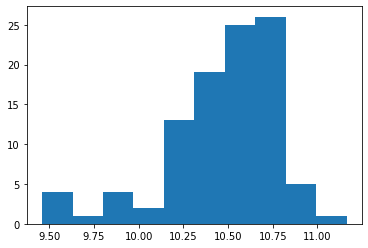

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import random

mu = 10
sigma = 2
n = 50
#obtendo a amostra original
S = st.norm.rvs(mu,sigma,size=n)

#lista para armazenar o parametro de interesse (mediana)
Stheta = []

r = 100
#obtendo as réplicas
for i in range(r):
  Si = random.choices(list(S),k=n)
  Stheta.append(np.median(Si))

CIinf = np.quantile(Stheta,0.025) #usando 95% de confiança
CIsup = np.quantile(Stheta,0.975)

print("IC para a mediana à 95% de confiança: ["+str(round(CIinf,2))+","+str(round(CIsup,2))+"]")

plt.hist(Stheta)

## Exemplo (Preços de casas)

No caso acima, nós conhecíamos a população, mas esta técnica é realmente interessante quando a população não é conhecida. Considere os dados de preços de casas em https://dasl.datadescription.com/download/data/3205. Construa um intervalo de confiança para o preço mediano à 90\% de confiança.

In [ ]:
import pandas as pd
!wget https://dasl.datadescription.com/download/data/3205
casas = pd.read_csv("3205",sep="\t")
casas

--2022-01-03 12:00:05--  https://dasl.datadescription.com/download/data/3205
Resolving dasl.datadescription.com (dasl.datadescription.com)... 45.79.130.90
Connecting to dasl.datadescription.com (dasl.datadescription.com)|45.79.130.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637 [text/plain]
Saving to: ‘3205.1’

3205.1              100%[===================>]     637  --.-KB/s    in 0s      

2022-01-03 12:00:05 (73.5 MB/s) - ‘3205.1’ saved [637/637]



,Price,Fireplace
0,142212,No
1,134865,Yes
2,118007,Yes
3,138297,Yes
4,129470,Yes
5,206512,No
6,50709,No
7,108794,No
8,68353,No
9,123266,No


In [ ]:
#Amostra original, tamanho da amostra e número de réplicas
S = casas.Price
n = len(S)
r = 100

#lista para armazenar o parametro de interesse (mediana)
theta = []

#obtendo as réplicas e calculando a mediana
for i in range(r):
  Si = random.choices(list(S),k=n)
  theta.append(np.median(Si))

CIinf = np.quantile(theta,0.05)
CIsup = np.quantile(theta,0.95)

print("Com 90% de confiança, a mediana do preço das casas está no intervalo ["+str(round(CIinf,2))+","+str(round(CIsup,2))+"]")

Com 90% de confiança, a mediana do preço das casas está no intervalo [116289.0,136602.08]


Comparemos os preços das casas sem lareira e com lareira. Usemos a mediana (para não sermos afetados pelo *outlier*).

In [ ]:
#Amostras originais com e sem lareira e número de réplicas
S1 = casas[casas.Fireplace=="Yes"]
S2 = casas[casas.Fireplace=="No"]
r = 1000

def boot(dados):
  #lista para armazenar o parametro de interesse (mediana)
  theta = []
  n = len(dados)
  #obtendo as réplicas e calculando a mediana
  for i in range(r):
    Si = random.choices(list(dados),k=n)
    theta.append(np.median(Si))

  CIinf = np.quantile(theta,0.05)
  CIsup = np.quantile(theta,0.95)
  return CIinf, CIsup

#calculo do IC via bootstrap usando a lib scipy.stats
print("CIs da mediana à 90% de confiança")
print("Com lareira",boot(S1.Price))
print("Sem lareira",boot(S2.Price))
#print(st.bootstrap(S2.Prices,np.median,confidence_level=0.9))
#print("Com 90% de confiança, a mediana do preço das casas está no intervalo ["+str(round(CIinf,2))+","+str(round(CIsup,2))+"]")

CIs da mediana à 90% de confiança
Com lareira (127220.475, 151917.0)
Sem lareira (84675.0, 125853.0)


# **Bônus**: Por que $\bar{x} = \frac{\sum_{i=1}^{n}{(x_i})}{n}$ é um estimador não-viesado de $\mu$?


Considere uma VA $X$ com uma certa distribuição e com $E(X)=\mu$ e $Var(X)=\sigma^2$. Considere ainda que retiramos $n$ amostras desta VA representadas como: $X_1,X_2,X_3,\ldots,X_n$.

Sobre esta VA definimos ainda uma outra $\bar{X} = \frac{\sum_{i=1}^{n}(X_i)}{n}$, que é a VA da média amostral de $X$.

Para que um estimador seja não viesado, sabemos que $E(\hat{\theta})=\theta$. Portanto, em nosso caso queremos ver se $E(\bar{X})=\mu$.

Assim vemos que

$E(\bar{X})=E[\frac{\sum_{i=1}^{n}{X_i}}{n}] \\
E(\bar{X})=\frac{E[\sum_{i=1}^{n}{X_i}]}{n} \\
E(\bar{X})=\frac{\sum_{i=1}^{n}E[{X_i}]}{n} \\
E(\bar{X})=\frac{\sum_{i=1}^{n}\mu}{n} \\
E(\bar{X})=\frac{n\mu}{n} = \mu$

Como podemos observar $E(\bar{X}) = \mu$, logo o estimador é não viesado.

# **Bônus**: Por que $s^2 = \frac{\sum_{i=1}^{n}{(x_i-\bar{x}})}{n}$ é um estimador viesado de $\sigma^2$?


Considere uma VA $X$ com uma certa distribuição e com $E(X)=\mu$ e $Var(X)=\sigma^2$. Considere ainda que retiramos $n$ amostras desta VA representadas como: $X_1,X_2,X_3,\ldots,X_n$.

Sobre esta VA definimos ainda uma outra $S^2 = \frac{\sum_{i=1}^{n}(X_i-\mu)^2}{n}$, que é a VA da variância de $X$.

Para que um estimador seja não viesado, sabemos que $E(\hat{\theta})=\theta$. Portanto, em nosso caso queremos ver se $E(S^2)=\sigma^2$.

Assim vemos que

$E(S^2)=E(\frac{\sum_{i=1}^{n}{(X_i-\bar{X}})^2}{n}) \\
E(S^2)=\frac{E[\sum_{i=1}^{n}{(X_i-\bar{X}})^2]}{n}=\frac{E[\sum_{i=1}^{n}{(X_i-\mu+\mu-\bar{X}})^2]}{n} \\
E(S^2)=\frac{E[\sum_{i=1}^{n}{((X_i-\mu)-(\bar{X}-\mu)})^2]}{n} \\
E(S^2)=\frac{E[\sum_{i=1}^{n}(X_i-\mu)^2 + \sum_{i=1}^{n}(\bar{X}-\mu)^2-2\sum_{i=1}^{n}(X_i-\mu)(\bar{X}-\mu)}{n} \\
E(S^2)=\frac{E[\sum_{i=1}^{n}(X_i-\mu)^2] + E[\sum_{i=1}^{n}(\bar{X}-\mu)^2]-E[2\sum_{i=1}^{n}(X_i-\mu)(\bar{X}-\mu)]}{n} \\
E(S^2)=\frac{\sum_{i=1}^{n}E[(X_i-\mu)^2] + \sum_{i=1}^{n}E[(\bar{X}-\mu)^2]-E[2\sum_{i=1}^{n}(X_i-\mu)(\bar{X}-\mu)]}{n}$

Deve-se observar que subtraindo $\mu$ dos lados da definição de $\bar{X}$ temos que

$\bar{X}-\mu = \frac{\sum_{i=1}^{n}(X_i)}{n}-\mu \\
\bar{X}-\mu = \frac{\sum_{i=1}^{n}(X_i)}{n}-\frac{\sum_{i=1}^{n}\mu}{n} \\
\bar{X}-\mu = \frac{\sum_{i=1}^{n}(X_i-\mu)}{n} \\
\sum_{i=1}^{n}(X_i-\mu) = n(\bar{X}-\mu) $

Desta forma podemos continuar a derivação de $E(S^2)$

$E(S^2)=\frac{\sum_{i=1}^{n}E[(X_i-\mu)^2] + \sum_{i=1}^{n}E[(\bar{X}-\mu)^2]-E[2(\bar{X}-\mu)\sum_{i=1}^{n}(X_i-\mu)]}{n} \\
E(S^2)=\frac{\sum_{i=1}^{n}Var(X_i) + \sum_{i=1}^{n}Var(\bar{X})-E[2n(\bar{X}-\mu)^2]}{n} \\
E(S^2)=\frac{n\sigma^2 + n\frac{\sigma^2}{n}-2nE[(\bar{X}-\mu)^2]}{n} \\
E(S^2)=\sigma^2 + \frac{\sigma^2}{n} - \frac{2\sigma^2}{n} \\
E(S^2)=\frac{(n-1)\sigma^2}{n}$

Como podemos observar $E(S^2) \lt \sigma^2$, logo o estimador é viesado.